In [123]:
!pip install pyspellchecker
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [125]:
from textblob import TextBlob
from collections import Counter
from spellchecker import SpellChecker

In [126]:
import nltk
from nltk.corpus import words, brown
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [127]:
df = pd.read_csv('train.csv')

# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

In [128]:
# df = pd.read_csv('test.csv')


# Create new features

word_count: number of words\
sentence_count: number of sentence\
Lexical_diversity: ratio of unique words to the total number of words\
avg_sentence_length: average number of words per sentence\
spelling_errors: number of words misspelled\
rare_words: number of unique rare words used(outside of 15000 common words in english)

In [129]:
spell = SpellChecker()
all_words = brown.words()
word_freq = FreqDist(w.lower() for w in all_words if w.isalpha())

# Get the 15000 most common words based on frequency
common_words = set(word for word, freq in word_freq.most_common(15000))

In [130]:
def calculate_features(text):
    blob = TextBlob(text)
    word_count = len(blob.words)
    sentence_count = len(blob.sentences)
    lexical_diversity = len(set(blob.words)) / word_count
    avg_sentence_length = word_count / sentence_count

    # Check for spell error
    spell_error = spell.unknown(blob.words)
    spell_error_count = len(spell_error)

    # Find rare words that are not spell errors
    rare_word = set([word for word in blob.words.lower() if word not in common_words and word not in spell_error])
    rare_word_count = len(rare_word)

    return pd.Series([word_count, sentence_count, lexical_diversity, avg_sentence_length, spell_error_count, rare_word_count, rare_word])

In [131]:
test_df[['word_count', 'sentence_count', 'lexical_diversity', 'avg_sentence_length', 'spelling_errors', 'rare_words', 'rare_words_usage']] = test_df['full_text'].apply(calculate_features)

In [132]:
test_df

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_count,sentence_count,lexical_diversity,avg_sentence_length,spelling_errors,rare_words,rare_words_usage
1552,772D27D400BB,It god to have a possitive attitude when you d...,3.0,2.5,2.5,2.0,2.0,2.0,427,6,0.269321,71.166667,19,4,"{mom, positives, negatives, costumers}"
2114,9E8F3C6405CA,Why do people ask more then one person for adv...,3.0,2.0,3.0,3.5,3.0,3.0,280,6,0.346429,46.666667,3,1,{perspectives}
1965,948771F795EB,"We accomplish more when we are active, and are...",4.0,4.0,3.0,4.0,4.0,4.0,441,22,0.374150,20.045455,1,5,"{mom, tutoring, busier, mangoes, soccer}"
3856,FE14D7378CFB,Do you agree or disagree about imagination bei...,3.0,3.0,3.5,3.0,3.5,3.5,346,13,0.424855,26.615385,5,3,"{disagreed, soccer, wont}"
1610,7AAE019F70D6,I disagree with the principal saying that all ...,3.5,3.5,3.5,3.5,3.0,3.5,464,8,0.336207,58.000000,13,6,"{fainted, anytime, stressful, homework, wont, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,83B3CD03C693,An enjoyable educational activity could be pla...,2.0,2.5,3.0,3.0,3.5,2.0,243,9,0.584362,27.000000,16,4,"{motivate, 20, enjoyable, 1}"
3760,F9D0974B3AF7,"I disagree about extending school because,Pare...",2.5,2.5,3.0,3.0,2.5,2.5,221,10,0.466063,22.100000,0,1,{cleans}
1885,8E2EB0B4B92C,"The author Ralph waldo Emerson once wrote "" To...",2.0,3.0,3.0,3.0,3.0,2.5,489,26,0.284254,18.807692,7,3,"{whats, pressured, somethings}"
2390,B1BF25C4C28B,"My mom always tell me "" keep going until you r...",4.0,3.5,4.0,3.5,3.5,4.0,538,23,0.427509,23.391304,8,5,"{mom, moles, celebrities, worthless, coworkers}"


#Correlation Map

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps

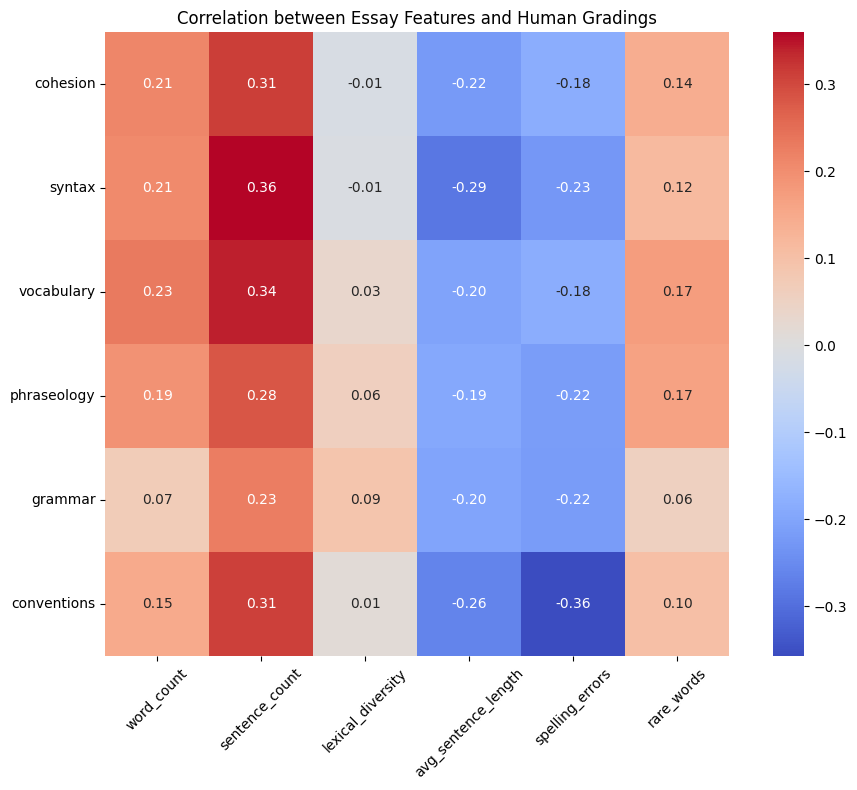

In [134]:
grading_columns = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

# List of feature columns
feature_columns = ['word_count', 'sentence_count', 'lexical_diversity', 'avg_sentence_length', 'spelling_errors', 'rare_words']

# Calculate correlation matrix only for the relevant columns
correlation_matrix = test_df[grading_columns + feature_columns].corr()
# Extract the relevant correlations (grading columns vs feature columns)
relevant_correlation_matrix = correlation_matrix.loc[grading_columns, feature_columns]

# Create a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(relevant_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation between Essay Features and Human Gradings')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

#Model prediction grades

In [135]:
deberta_df = pd.read_csv('deberta_test_pred.csv')
gpt_df = pd.read_csv('gpt_test_pred.csv')
gpt_prompt_df = pd.read_csv('gpt_test_pred_ver3.csv')
distilBERT_df = pd.read_csv('updated_distilBERT_test_predictions.csv')

In [136]:
deberta_df.describe()

,Unnamed: 0,cohesion,syntax,vocabulary,phraseology,grammar,conventions,tokenize_length,pred_cohesion,pred_syntax,pred_vocabulary,pred_phraseology,pred_grammar,pred_conventions
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,391.000000,3.126437,3.015964,3.212644,3.109195,3.038953,3.077267,490.097063,3.123150,3.032362,3.240731,3.123725,3.025909,3.075533
std,226.176922,0.651069,0.651626,0.574217,0.658812,0.696687,0.680450,221.733471,0.434930,0.449945,0.391763,0.452783,0.487852,0.475743
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,83.000000,1.785378,1.707369,2.058366,1.879817,1.810396,1.567451
25%,195.500000,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000,329.500000,2.823419,2.726944,2.963355,2.813917,2.683890,2.739505
50%,391.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,463.000000,3.152786,3.021328,3.244160,3.118558,3.014243,3.086829
75%,586.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,599.000000,3.444113,3.364869,3.521746,3.454530,3.378233,3.419155
max,782.000000,5.000000,4.500000,5.000000,5.000000,5.000000,5.000000,1358.000000,4.087908,4.122328,4.269272,4.180129,4.193138,4.146626


In [137]:
deberta_df = pd.merge(test_df['text_id'], deberta_df, on='text_id', how='left')

In [138]:
deberta_df

,text_id,Unnamed: 0,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,tokenize_length,pred_cohesion,pred_syntax,pred_vocabulary,pred_phraseology,pred_grammar,pred_conventions
0,772D27D400BB,437,It god to have a possitive attitude when you d...,3.0,2.5,2.5,2.0,2.0,2.0,491,2.370159,2.297775,2.593205,2.368285,2.268839,2.234993
1,9E8F3C6405CA,153,Why do people ask more then one person for adv...,3.0,2.0,3.0,3.5,3.0,3.0,299,2.894726,2.888481,3.021310,2.994012,3.069737,2.983806
2,948771F795EB,434,"We accomplish more when we are active, and are...",4.0,4.0,3.0,4.0,4.0,4.0,486,3.782890,3.838259,3.872895,3.877454,3.942481,3.902605
3,FE14D7378CFB,264,Do you agree or disagree about imagination bei...,3.0,3.0,3.5,3.0,3.5,3.5,370,3.152786,3.095186,3.256041,3.224982,3.197816,3.161313
4,7AAE019F70D6,477,I disagree with the principal saying that all ...,3.5,3.5,3.5,3.5,3.0,3.5,515,2.996607,2.900013,3.120658,3.007234,2.912966,2.873323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,83B3CD03C693,139,An enjoyable educational activity could be pla...,2.0,2.5,3.0,3.0,3.5,2.0,292,2.812602,2.788403,3.030274,2.956526,2.932073,2.635836
779,F9D0974B3AF7,66,"I disagree about extending school because,Pare...",2.5,2.5,3.0,3.0,2.5,2.5,238,3.162424,3.203574,3.236301,3.265305,3.391376,3.293369
780,8E2EB0B4B92C,544,"The author Ralph waldo Emerson once wrote "" To...",2.0,3.0,3.0,3.0,3.0,2.5,562,3.376656,3.351243,3.421665,3.405946,3.342486,3.401318
781,B1BF25C4C28B,595,"My mom always tell me "" keep going until you r...",4.0,3.5,4.0,3.5,3.5,4.0,603,3.834468,3.813438,3.972873,3.902821,3.825356,3.914064


In [139]:
gpt_df = gpt_df.rename(columns={col: 'pred_' + col for col in grading_columns})
gpt_df.describe()

,Unnamed: 0,pred_cohesion,pred_syntax,pred_vocabulary,pred_phraseology,pred_grammar,pred_conventions
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,391.000000,2.990421,2.608557,2.754151,2.522989,2.452746,2.505747
std,226.176922,0.583422,0.468677,0.527897,0.520164,0.578551,0.512908
min,0.000000,2.000000,1.500000,2.000000,1.000000,1.000000,1.000000
25%,195.500000,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000
50%,391.000000,3.000000,2.500000,3.000000,2.500000,2.000000,2.500000
75%,586.500000,3.500000,3.000000,3.000000,3.000000,3.000000,3.000000
max,782.000000,4.500000,4.000000,4.000000,4.500000,4.500000,4.000000


In [140]:
gpt_df

,Unnamed: 0,text_id,pred_cohesion,pred_syntax,pred_vocabulary,pred_phraseology,pred_grammar,pred_conventions
0,0,772D27D400BB,2.0,2.5,2.0,2.0,2.5,2.0
1,1,9E8F3C6405CA,3.5,3.0,3.0,3.5,3.0,3.0
2,2,948771F795EB,3.5,3.0,3.5,3.0,3.0,3.0
3,3,FE14D7378CFB,3.0,2.5,3.0,2.5,2.5,3.0
4,4,7AAE019F70D6,2.5,2.0,2.5,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...
778,778,83B3CD03C693,2.5,2.0,2.0,2.0,2.5,2.0
779,779,F9D0974B3AF7,3.0,2.5,2.0,2.5,2.0,2.5
780,780,8E2EB0B4B92C,3.5,3.0,3.5,3.0,3.5,3.0
781,781,B1BF25C4C28B,3.5,3.0,3.5,3.0,3.0,3.0


In [141]:
gpt_prompt_df = gpt_prompt_df.rename(columns={col: 'pred_' + col for col in grading_columns})
gpt_prompt_df.describe()

,Unnamed: 0,pred_cohesion,pred_syntax,pred_vocabulary,pred_phraseology,pred_grammar,pred_conventions
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,780.000000
mean,391.000000,2.637931,2.254789,2.608557,2.353129,2.167305,2.312821
std,226.176922,0.424028,0.399679,0.437636,0.504595,0.453860,0.418862
min,0.000000,1.500000,1.500000,2.000000,1.500000,1.500000,2.000000
25%,195.500000,2.500000,2.000000,2.500000,2.000000,2.000000,2.000000
50%,391.000000,2.500000,2.000000,2.500000,2.000000,2.000000,2.000000
75%,586.500000,2.500000,2.500000,2.500000,2.500000,2.000000,2.500000
max,782.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [142]:
gpt_prompt_df.dtypes

Unnamed: 0            int64
text_id              object
pred_cohesion       float64
pred_syntax         float64
pred_vocabulary     float64
pred_phraseology    float64
pred_grammar        float64
pred_conventions    float64
dtype: object

In [143]:
distilBERT_df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,pred_cohesion,pred_syntax,pred_vocabulary,pred_phraseology,pred_grammar,pred_conventions
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,3.126437,3.015964,3.212644,3.109195,3.038953,3.077267,3.159366,3.078925,3.282201,3.111620,3.027177,3.077715
std,0.651069,0.651626,0.574217,0.658812,0.696687,0.680450,0.568206,0.518351,0.492014,0.530133,0.591721,0.571564
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.371086,1.692512,1.906839,1.569690,1.525700,1.369442
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000,2.776169,2.711582,2.916236,2.731097,2.569701,2.697888
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.163273,3.096978,3.296294,3.121753,3.009525,3.091959
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.553957,3.442828,3.616905,3.491226,3.470718,3.466598
max,5.000000,4.500000,5.000000,5.000000,5.000000,5.000000,4.670754,4.485359,5.219347,4.580180,4.569763,4.696817


In [144]:
distilBERT_df.dtypes

text_id              object
full_text            object
cohesion            float64
syntax              float64
vocabulary          float64
phraseology         float64
grammar             float64
conventions         float64
pred_cohesion       float64
pred_syntax         float64
pred_vocabulary     float64
pred_phraseology    float64
pred_grammar        float64
pred_conventions    float64
dtype: object

In [145]:
pred_grading_columns = ['pred_' + col for col in grading_columns]

# Mean Std graph

In [146]:
import matplotlib.cm as cm

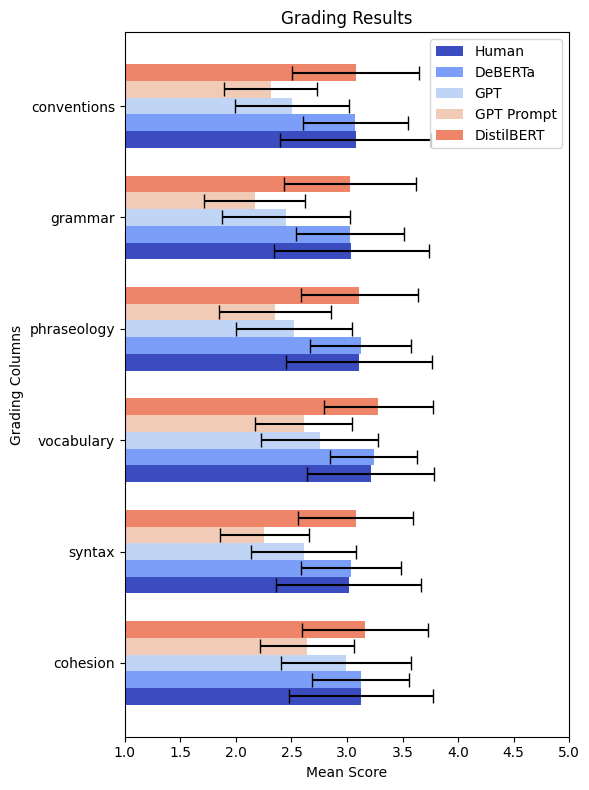

In [147]:
mean_ground_truth = test_df[grading_columns].mean()
std_dev_ground_truth = test_df[grading_columns].std()

mean_deberta = deberta_df[pred_grading_columns].mean()
std_dev_deberta = deberta_df[pred_grading_columns].std()

mean_gpt = gpt_df[pred_grading_columns].mean()
std_dev_gpt = gpt_df[pred_grading_columns].std()

mean_gpt_prompt = gpt_prompt_df[pred_grading_columns].mean()
std_dev_gpt_prompt = gpt_prompt_df[pred_grading_columns].std()

mean_distillBERT = distilBERT_df[pred_grading_columns].mean()
std_dev_distillBERT = distilBERT_df[pred_grading_columns].std()

# Plotting
models = ['Human', 'DeBERTa', 'GPT', 'GPT Prompt', 'DistilBERT']
y = range(len(grading_columns))  # The y-axis will now correspond to the grading columns
height = 0.15  # The height of each bar in the horizontal plot
colors = [cm.coolwarm(i/len(models)) for i in range(len(models))]

fig, ax = plt.subplots(figsize=(6, 8))

for i, (mean, std_dev, model, color) in enumerate(zip([mean_ground_truth, mean_deberta, mean_gpt, mean_gpt_prompt, mean_distillBERT],
                                                [std_dev_ground_truth, std_dev_deberta, std_dev_gpt, std_dev_gpt_prompt, std_dev_distillBERT],
                                                models, colors)):
    ax.barh([pos + i * height for pos in y], mean, height=height, label=model, xerr=std_dev, capsize=5, color=color)

ax.set_ylabel('Grading Columns')
ax.set_xlabel('Mean Score')
ax.set_title('Grading Results')
ax.set_yticks([pos + 2 * height for pos in y])
ax.set_yticklabels(grading_columns)
ax.set_xlim(1, 5)
ax.legend()

plt.tight_layout()
plt.show()

# RMSE comparison

In [148]:
# !pip install scikit-learn==1.4

In [149]:
import sklearn
print(sklearn.__version__)

1.4.0


In [150]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import mean_squared_error, root_mean_squared_error
# import warnings
# warnings.filterwarnings("ignore")

# test = pd.read_csv("deberta_test_pred.csv")
# test.drop(columns={"Unnamed: 0"}, inplace=True)

# measures = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
# for measure in measures:
#     mse = calculate_rmse(test_df[measure], deberta_df[f'pred_{measure}'])
#     rmse = mean_squared_error(test_df[measure], deberta_df[f'pred_{measure}'], squared=False)
#     rrmse = root_mean_squared_error(test_df[measure], deberta_df[f'pred_{measure}'])
#     print(mse, rmse, rrmse)

In [151]:
def calculate_rmse(actual, predicted):
    return root_mean_squared_error(actual, predicted)
    # return np.sqrt(((actual - predicted) ** 2).mean())

In [152]:
model_dataframes = [deberta_df, gpt_df, gpt_prompt_df, distilBERT_df]
model_names = ['DeBERTa', 'GPT', 'GPT Prompt', 'DistilBERT']

# Initialize a DataFrame to hold all RMSE values
rmse_table = pd.DataFrame(columns=grading_columns + ['Average'], index=model_names)

for model_df, model_name in zip(model_dataframes, model_names):
    rmses = []
    for col in grading_columns:
        rmse = calculate_rmse(test_df[col].fillna(0), model_df['pred_' + col].fillna(0))
        # rmse = root_mean_squared_error(test_df[col], model_df[f'pred_{measure}'])
        rmses.append(rmse)

    rmse_table.loc[model_name, grading_columns] = rmses
    rmse_table.loc[model_name, 'Average'] = np.mean(rmses)


In [153]:
print(rmse_table)

            cohesion    syntax vocabulary phraseology   grammar conventions  \
DeBERTa      0.49202  0.450377    0.42711    0.456786  0.474395    0.446853   
GPT         0.635528  0.749627   0.724503    0.876834  0.933963    0.820203   
GPT Prompt  0.783164  1.000319   0.830455    0.998082  1.101346    0.998242   
DistilBERT  0.638845  0.602458   0.549499     0.61849  0.695621     0.62018   

             Average  
DeBERTa     0.457923  
GPT          0.79011  
GPT Prompt  0.951935  
DistilBERT  0.620849  


In [154]:
deberta_df

,text_id,Unnamed: 0,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,tokenize_length,pred_cohesion,pred_syntax,pred_vocabulary,pred_phraseology,pred_grammar,pred_conventions
0,772D27D400BB,437,It god to have a possitive attitude when you d...,3.0,2.5,2.5,2.0,2.0,2.0,491,2.370159,2.297775,2.593205,2.368285,2.268839,2.234993
1,9E8F3C6405CA,153,Why do people ask more then one person for adv...,3.0,2.0,3.0,3.5,3.0,3.0,299,2.894726,2.888481,3.021310,2.994012,3.069737,2.983806
2,948771F795EB,434,"We accomplish more when we are active, and are...",4.0,4.0,3.0,4.0,4.0,4.0,486,3.782890,3.838259,3.872895,3.877454,3.942481,3.902605
3,FE14D7378CFB,264,Do you agree or disagree about imagination bei...,3.0,3.0,3.5,3.0,3.5,3.5,370,3.152786,3.095186,3.256041,3.224982,3.197816,3.161313
4,7AAE019F70D6,477,I disagree with the principal saying that all ...,3.5,3.5,3.5,3.5,3.0,3.5,515,2.996607,2.900013,3.120658,3.007234,2.912966,2.873323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,83B3CD03C693,139,An enjoyable educational activity could be pla...,2.0,2.5,3.0,3.0,3.5,2.0,292,2.812602,2.788403,3.030274,2.956526,2.932073,2.635836
779,F9D0974B3AF7,66,"I disagree about extending school because,Pare...",2.5,2.5,3.0,3.0,2.5,2.5,238,3.162424,3.203574,3.236301,3.265305,3.391376,3.293369
780,8E2EB0B4B92C,544,"The author Ralph waldo Emerson once wrote "" To...",2.0,3.0,3.0,3.0,3.0,2.5,562,3.376656,3.351243,3.421665,3.405946,3.342486,3.401318
781,B1BF25C4C28B,595,"My mom always tell me "" keep going until you r...",4.0,3.5,4.0,3.5,3.5,4.0,603,3.834468,3.813438,3.972873,3.902821,3.825356,3.914064


# feature correlation graphs

Grading diff: model grading - human grading

In [170]:
distilBERT_df.reset_index(drop=True, inplace=True)
gpt_prompt_df.reset_index(drop=True, inplace=True)
gpt_df.reset_index(drop=True, inplace=True)
deberta_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [202]:
def vis_diff(model, name):
  diff_columns = ['diff_' + col for col in grading_columns]
  for col in grading_columns:

      model['diff_' + col] = (model['pred_' + col] - test_df[col])


  # Combine differences with feature columns
  analysis_df = pd.concat([model[diff_columns], test_df[feature_columns]], axis=1)

  # Calculate correlation matrix
  correlation_matrix = analysis_df.corr()

  # Filter the correlation matrix to include only grading differences vs feature correlations
  filtered_corr = correlation_matrix.loc[diff_columns, feature_columns]

  # Plotting the heatmap
  plt.figure(figsize=(12, 8))
  sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation between Grading Differences and Features for Model '+ name)
  plt.show()


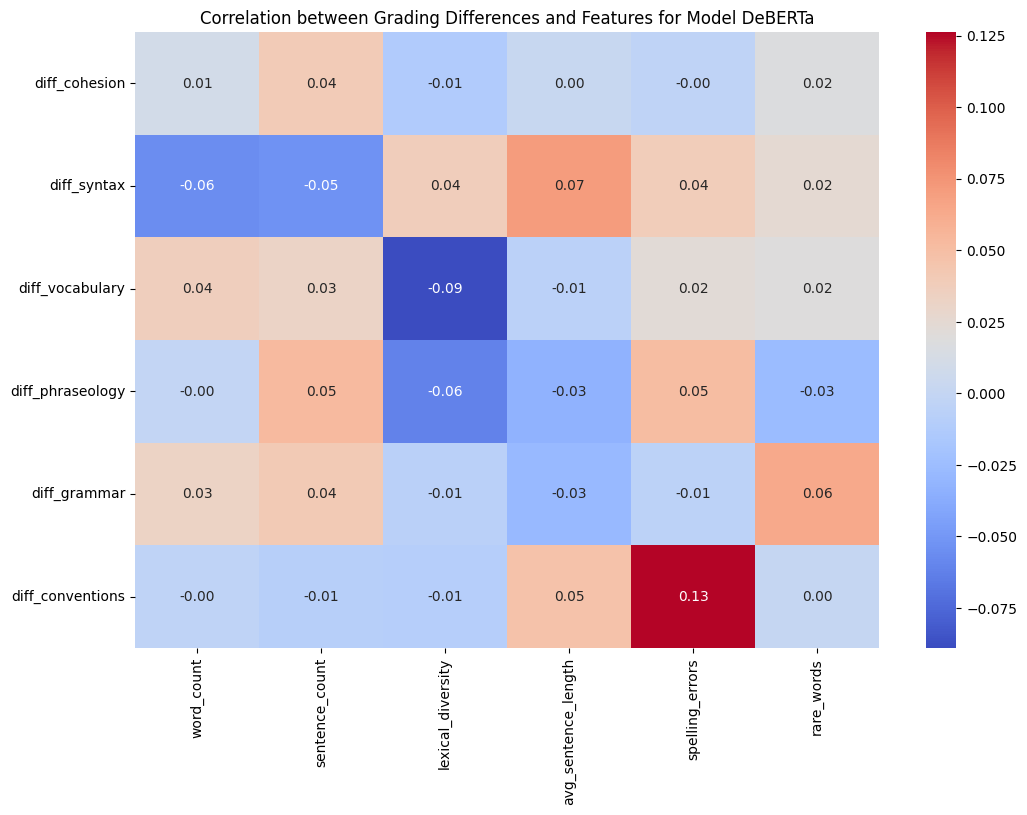

In [203]:
vis_diff(deberta_df, "DeBERTa")

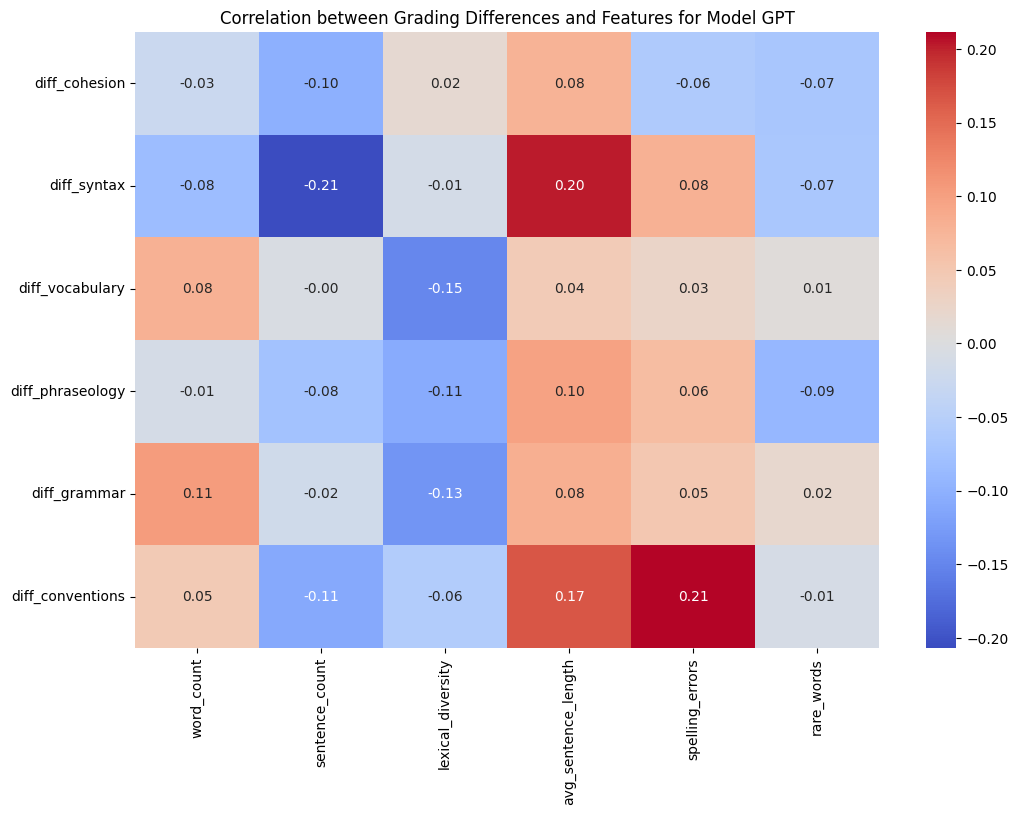

In [204]:
vis_diff(gpt_df, "GPT")

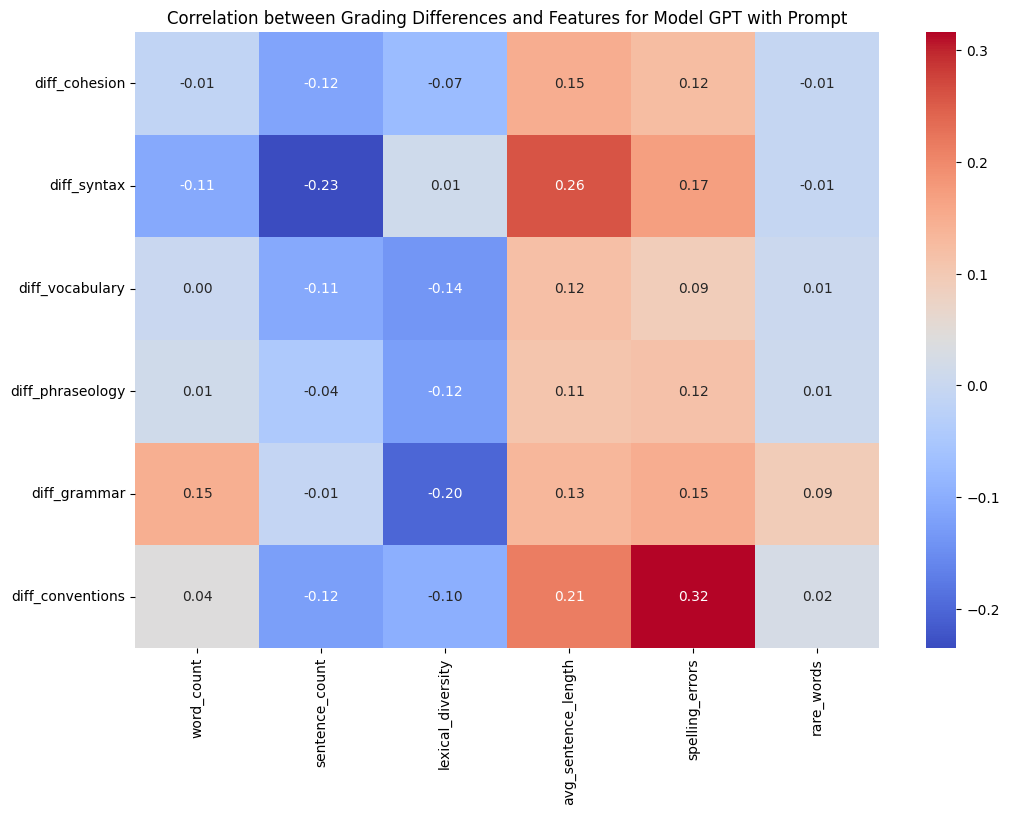

In [205]:
vis_diff(gpt_prompt_df, "GPT with Prompt")

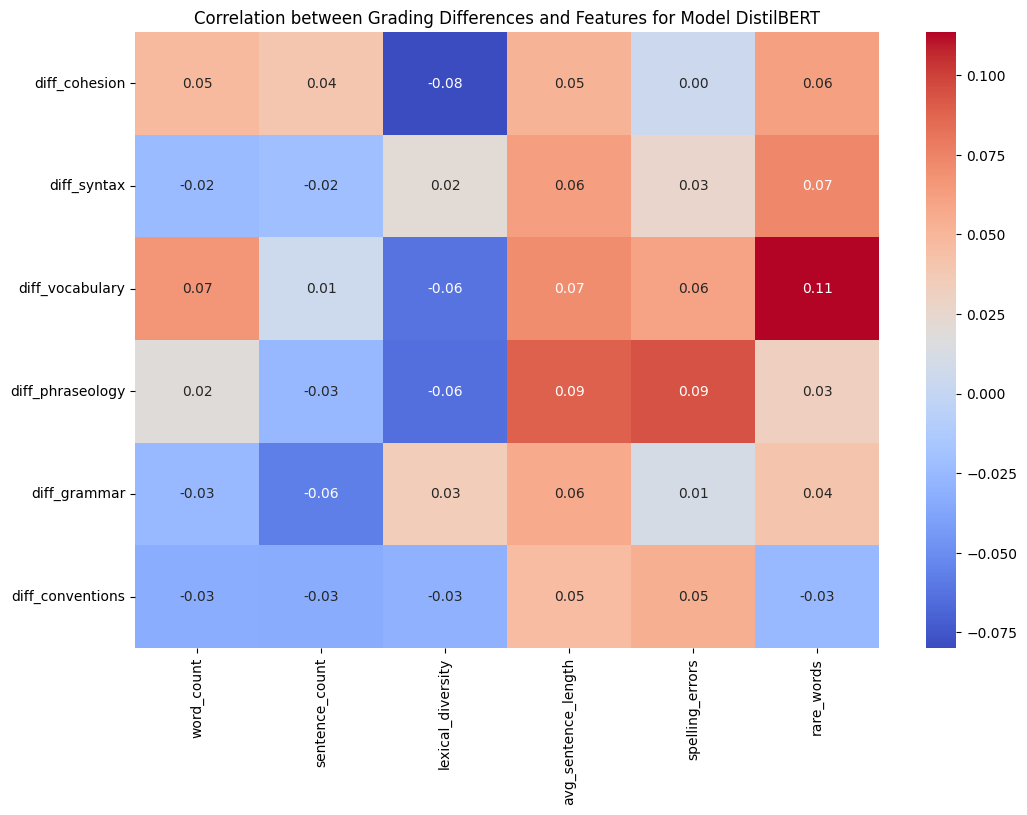

In [189]:
vis_diff(distilBERT_df, "DistilBERT")

# Feature column hypothesis testing

In [190]:
deberta_df

,text_id,Unnamed: 0,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,tokenize_length,...,diff_vocabulary,diff_phraseology,diff_grammar,diff_conventions,abs_diff_cohesion,abs_diff_syntax,abs_diff_vocabulary,abs_diff_phraseology,abs_diff_grammar,abs_diff_conventions
0,772D27D400BB,437,It god to have a possitive attitude when you d...,3.0,2.5,2.5,2.0,2.0,2.0,491,...,0.093205,0.368285,0.268839,0.234993,0.629841,0.202225,0.093205,0.368285,0.268839,0.234993
1,9E8F3C6405CA,153,Why do people ask more then one person for adv...,3.0,2.0,3.0,3.5,3.0,3.0,299,...,0.021310,-0.505988,0.069737,-0.016194,0.105274,0.888481,0.021310,0.505988,0.069737,0.016194
2,948771F795EB,434,"We accomplish more when we are active, and are...",4.0,4.0,3.0,4.0,4.0,4.0,486,...,0.872895,-0.122546,-0.057519,-0.097395,0.217110,0.161741,0.872895,0.122546,0.057519,0.097395
3,FE14D7378CFB,264,Do you agree or disagree about imagination bei...,3.0,3.0,3.5,3.0,3.5,3.5,370,...,-0.243959,0.224982,-0.302184,-0.338687,0.152786,0.095186,0.243959,0.224982,0.302184,0.338687
4,7AAE019F70D6,477,I disagree with the principal saying that all ...,3.5,3.5,3.5,3.5,3.0,3.5,515,...,-0.379342,-0.492766,-0.087034,-0.626677,0.503393,0.599987,0.379342,0.492766,0.087034,0.626677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,83B3CD03C693,139,An enjoyable educational activity could be pla...,2.0,2.5,3.0,3.0,3.5,2.0,292,...,0.030274,-0.043474,-0.567927,0.635836,0.812602,0.288403,0.030274,0.043474,0.567927,0.635836
779,F9D0974B3AF7,66,"I disagree about extending school because,Pare...",2.5,2.5,3.0,3.0,2.5,2.5,238,...,0.236301,0.265305,0.891376,0.793369,0.662424,0.703574,0.236301,0.265305,0.891376,0.793369
780,8E2EB0B4B92C,544,"The author Ralph waldo Emerson once wrote "" To...",2.0,3.0,3.0,3.0,3.0,2.5,562,...,0.421665,0.405946,0.342486,0.901318,1.376656,0.351243,0.421665,0.405946,0.342486,0.901318
781,B1BF25C4C28B,595,"My mom always tell me "" keep going until you r...",4.0,3.5,4.0,3.5,3.5,4.0,603,...,-0.027127,0.402821,0.325356,-0.085936,0.165532,0.313438,0.027127,0.402821,0.325356,0.085936


In [191]:
def calculate_abs_diffs(test_df, model_df):
    for col in grading_columns:
        model_df[f'abs_diff_{col}'] = (model_df[f'pred_{col}'] - test_df[col]).abs()

In [192]:
model_dfs = [deberta_df, gpt_df, gpt_prompt_df, distilBERT_df]

for model_df in model_dfs:
    calculate_abs_diffs(test_df, model_df)

In [193]:
test_df.dtypes

text_id                 object
full_text               object
cohesion               float64
syntax                 float64
vocabulary             float64
phraseology            float64
grammar                float64
conventions            float64
word_count               int64
sentence_count           int64
lexical_diversity      float64
avg_sentence_length    float64
spelling_errors          int64
rare_words               int64
rare_words_usage        object
dtype: object

In [194]:
# Function to select indices of top and bottom 50 essays based on absolute differences
def select_top_bottom(test_df, model_df):
    top_bottom_df = {}
    for col in grading_columns:
        top_50 = model_df.nsmallest(50, f'abs_diff_{col}')
        bottom_50 = model_df.nlargest(50, f'abs_diff_{col}')

        # Join with test_df to get feature columns
        top_50 = top_50.merge(test_df[['text_id'] + feature_columns], on="text_id")
        bottom_50 = bottom_50.merge(test_df[['text_id'] + feature_columns], on="text_id")

        top_bottom_df[col] = {'top_50': top_50, 'bottom_50': bottom_50}
    return top_bottom_df

In [195]:
# Apply the selection for each model
top_bottom_essays = {}
for model_df, model_name in zip(model_dataframes, model_names):
    top_bottom_essays[model_name] = select_top_bottom(test_df, model_df)

In [198]:
from scipy.stats import ttest_ind

def perform_t_tests(top_bottom_df):
    results = {}
    for col, groups in top_bottom_df.items():
        top_features = groups['top_50'][feature_columns]
        bottom_features = groups['bottom_50'][feature_columns]
        t_results = {}
        for feature in feature_columns:
            stat, p_value = ttest_ind(bottom_features[feature],top_features[feature], equal_var=False)
            if p_value < 0.05:
                t_results[feature] = {'statistic':  round(stat, 2), 'p_value': round(p_value, 2)}
        results[col] = t_results
    return results

In [199]:
t_test_results = {}
for key, value in top_bottom_essays.items():
    t_test_results[key] = perform_t_tests(value)

t_test_results

{'DeBERTa': {'cohesion': {},
  'syntax': {'avg_sentence_length': {'statistic': 2.25, 'p_value': 0.03}},
  'vocabulary': {'word_count': {'statistic': 3.33, 'p_value': 0.0}},
  'phraseology': {},
  'grammar': {},
  'conventions': {}},
 'GPT': {'cohesion': {},
  'syntax': {'word_count': {'statistic': 3.96, 'p_value': 0.0},
   'sentence_count': {'statistic': 3.25, 'p_value': 0.0},
   'lexical_diversity': {'statistic': -2.11, 'p_value': 0.04},
   'rare_words': {'statistic': 3.32, 'p_value': 0.0}},
  'vocabulary': {},
  'phraseology': {'rare_words': {'statistic': 2.14, 'p_value': 0.03}},
  'grammar': {'lexical_diversity': {'statistic': 2.78, 'p_value': 0.01},
   'avg_sentence_length': {'statistic': -3.47, 'p_value': 0.0}},
  'conventions': {'avg_sentence_length': {'statistic': -2.75, 'p_value': 0.01},
   'spelling_errors': {'statistic': -2.38, 'p_value': 0.02}}},
 'GPT Prompt': {'cohesion': {'sentence_count': {'statistic': 2.14,
    'p_value': 0.03}},
  'syntax': {'sentence_count': {'statist